In [28]:
from src.annotator import Annotator
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [29]:
def get_row_pair_A(pair, pair_prime):
    x, y = pair[0], pair[1]
    x_p, y_p = pair_prime[0], pair_prime[1]
    return [
        [0, 0, 0, -x, -y, -1, y_p*x, y_p*y, y_p],
        [x, y, 1, 0, 0, 0, -x_p*x, -x_p*y, -x_p]
    ]

def build_A(pairs, pairs_prime):
    A = np.zeros((pairs.shape[0] * 2, 9))
    for i, (p, p_prime) in enumerate(zip(pairs, pairs_prime)):
        A[ i*2 : (i+1)*2 ] = get_row_pair_A(p, p_prime)
    
    return A

def get_homography_matrix(pairs, pairs_prime):
    A = build_A(pairs, pairs_prime)
    _, _, v = np.linalg.svd(A)
    H = (v[-1] / v[-1, -1]).reshape(3, 3)
    return H

In [10]:
ann = Annotator('images/boat/img1.pgm', 'images/boat/img2.pgm', annotation_mode = False)
p = np.array(ann.coords)
points, points_prime = p[0], p[1]
print(points.shape, points_prime.shape)

Loading Annotator in data load mode...
Found annotations for images/boat/img1.pgm @ img1_annotation.txt, loading...
Found annotations for images/boat/img2.pgm @ img2_annotation.txt, loading...
(12, 2) (12, 2)


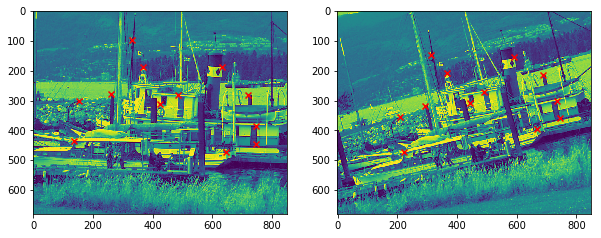

In [13]:
plt.figure(figsize=(10, 30))
plt.subplot(1, 2, 1)
plt.imshow(ann.images[0])
plt.scatter(points[:, 0], points[:, 1], marker='x', c='r')

plt.subplot(1, 2, 2)
plt.imshow(ann.images[1])
plt.scatter(points_prime[:, 0], points_prime[:, 1], marker='x', c='r')

plt.show()

In [20]:
H = get_homography_matrix(points, points_prime)

tmp_points = np.append(points, np.ones((points.shape[0], 1)), axis = 1)
projected_points = H.dot(tmp_points.T).T

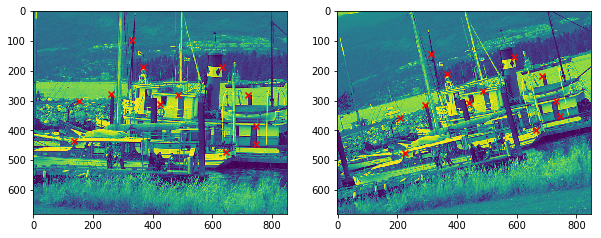

In [21]:
plt.figure(figsize=(10, 30))
plt.subplot(1, 2, 1)
plt.imshow(ann.images[0])
plt.scatter(points[:, 0], points[:, 1], marker='x', c='r')

plt.subplot(1, 2, 2)
plt.imshow(ann.images[1])
plt.scatter(projected_points[:, 0], projected_points[:, 1], marker='x', c='r')

plt.show()

In [25]:
from sklearn.metrics.pairwise import euclidean_distances

homography_distance = np.linalg.norm(projected_points[:, :2] - points_prime, axis = 1).mean() #mean euclidean distance between each pair of points
print('Accuracy: {}'.format(homography_distance))

Accuracy: 3.2380197214192137
